# Project Assignment B

# Tabel of Content

[1. Motivation](#1.-Motivation)

- [ What is your dataset?](#What-is-your-dataset?)

- [ Why did you choose this/these particular dataset(s)?](#Why-did-you-choose-this/these-particular-dataset(s)?)
- [What was your goal for the end user's experience?](#What-was-your-goal-for-the-end-user's-experience?)


[2. Basic Stats](#2.-Basic-Stats)

- [Write about your choices in data cleaning and preprocessing](#Write-about-your-choices-in-data-cleaning-and-preprocessing)
- [Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis](#Write-a-short-section-that-discusses-the-dataset-stats,-containing-key-points/plots-from-your-exploratory-data-analysis)

[3. Data Analysis](#3.-Data-Analysis)
- [Exploring pollution differences between neigbourhoods](#Exploring-pollution-differences-between-neigbourhoods)
- [Are some neighbourhoods more polluted than others?](#Are-some-neighbourhoods-more-polluted-than-others?)
- [Are the sources of pollution different in some neighbourhoods?](#Are-the-sources-of-pollution-different-in-some-neighbourhoods?)
- [Are more deaths, Asthma ER Visits, Cardiovascular Hospitalizations and Respiratory Hospitalizations in boroughs that have higher percent of poverty?](#Are-more-deaths,-Asthma-ER-Visits,-Cardiovascular-Hospitalizations-and-Respiratory-Hospitalizations-in-boroughs-that-have-higher-percent-of-poverty?)
- [Is it possible to predict pollution in the future?](#Is-it-possible-to-predict-pollution-in-the-future?)

[4. Genre](#4.-Genre)
- [Which genre of data story did you use?](#Which-genre-of-data-story-did-you-use?)
- [Tools used from the 3 categories of Visual Narrative and Narrative Structure](#Tools-used-from-the-3-categories-of-Visual-Narrative-and-Narrative-Structure)

[5. Visualization](#5.-Visualization)
- [Explaination of visualizations chosen and why are the right for this story](#Explaination-of-visualizations-chosen-and-why-are-the-right-for-this-story)

[6. Discussion](#6.-Discussion)

[What went well?](#What-went-well?)

[What is still missing? What could be improved? Why?](#What-is-still-missing?-What-could-be-improved?-Why?)


## Social Data Analysis and Visualization - Spring 2022

This project will explore air quality in New York City. We will look into the evolution of pollution in the last years, the affect pollution is having on people's health, as well as possible differences in pollution between New York neighbourhoods. We will also look into some predictions as to what air quality might look like in New York City in the coming years.

##### Starting by importing packages

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, IFrame

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource,HoverTool,Legend,FactorRange,DataRange1d, Span, Slider, CustomJS, Select,GeoJSONDataSource,LinearColorMapper
from bokeh.plotting import figure, show,save
from bokeh.models.widgets import Panel, Tabs
from bokeh.transform import factor_cmap
from bokeh.palettes import Oranges4, Blues4, brewer
from bokeh.layouts import column,gridplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import json


In [ ]:
import tempfile
from IPython.core.display import display, HTML
def bokeh_deepnote_show(plot):
    tmp_output_filename = tempfile.NamedTemporaryFile(suffix='.html').name
    output_file(tmp_output_filename)
    save(plot)

    f = open(tmp_output_filename, "r")
    display(HTML(f.read()))

## 1. Motivation

### What is your dataset?

A few different datasets were used in the analysis for this project. The datasets used are related to New York City air pollution, social data, and geo data.

#### Main Dataset

The main Dataset used is **Air_Quality.csv**. This dataset offers information on air quality surveillance data from New York City. The dataset is 1.7 MB, it has 14289 rows and 12 variables. The names and descriptions of the dataset's variables were found in the User Guide, available under attachments [here](https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r?fbclid=IwAR1G5t_e98bkJjc05yHqzFzjZ9EByKCmrmxJZPVhxgfx76fB7CC3AsvY3lM). The variables in the dataset are:

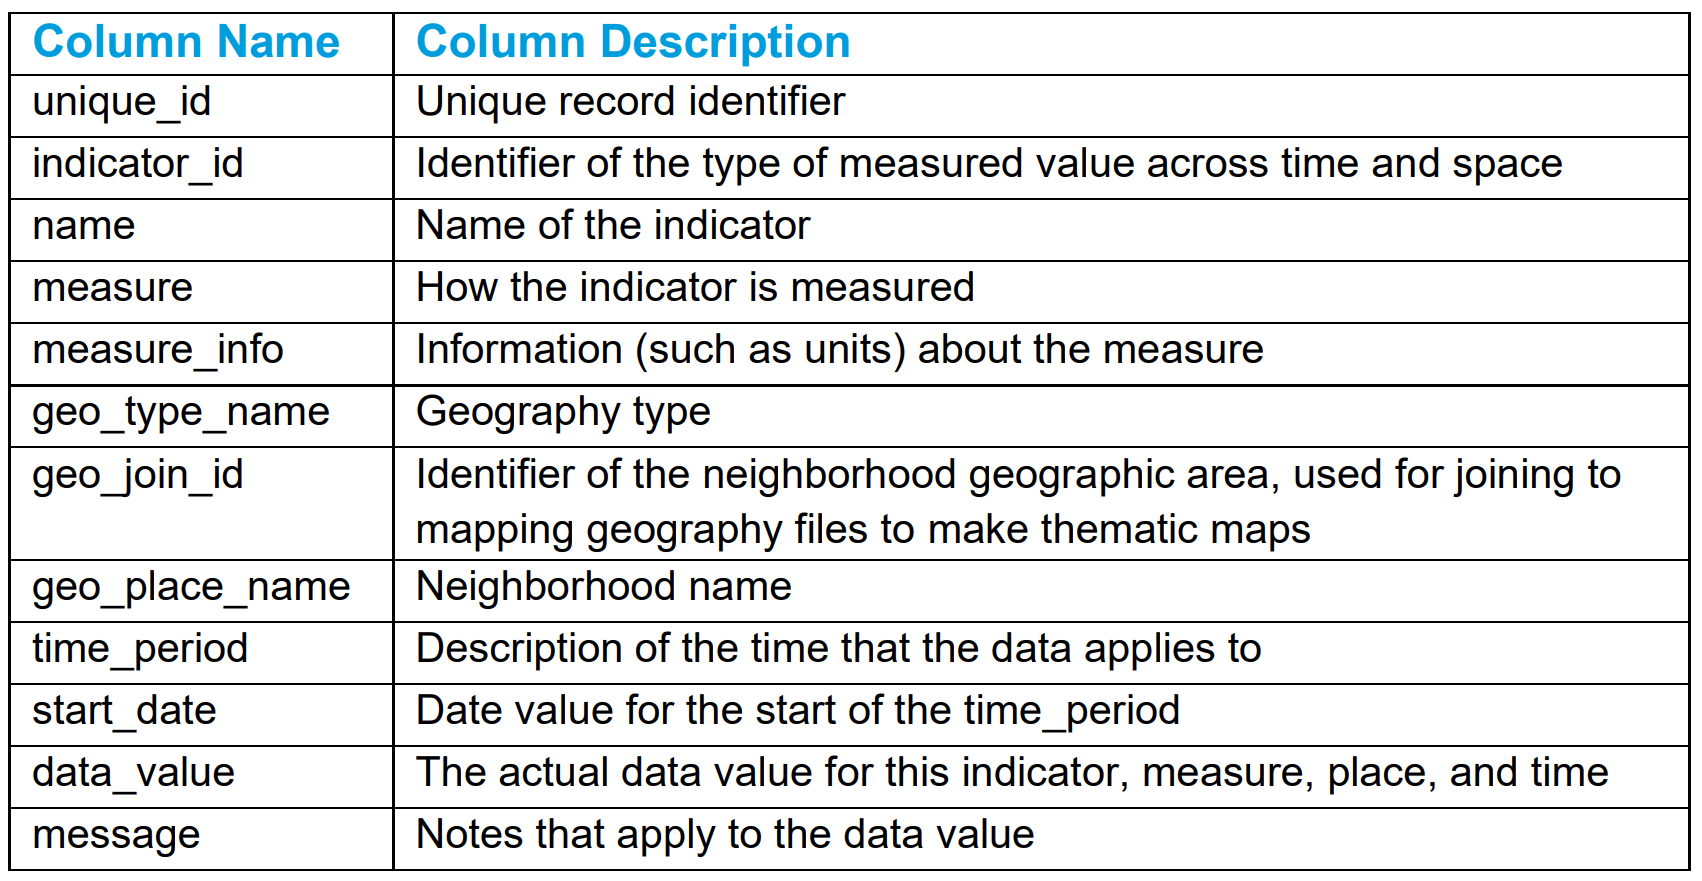

In [ ]:
Image(filename='Columns_in_Air_Quality.PNG') 

#### Other datasets

To support the analysis conducted on the Air Quality dataset, multiple other datasets were used. These datasets are listed here below. The datasets include informational data on New York City income levels, poverty, racial distribution, the city's population numbers by neighbourhoods, neighbourhood coordinates, and UHF42 neighbourhood information. One of the datasets includes information on the global land temperatures over a long period of time. This dataset was used in the very beginning of the project when deciding which city to focus on. 

Here you can see some information on the other datasets used:


**GlobalLandTemperaturesByCity.csv** is 508.1MB and contains 8599212 rows and 7 variables. It contains data about average Temperature in cities around the world each year since 1743.
Extracted [here](https://data.world/data-society/global-climate-change-data).

**Poverty.csv** is 75.6KB and contains 1950 rows and 5 variables. Individuals with earnings less than the Federal Poverty Level are included in this dataset (FPL). The Federal Poverty Level (FPL) is an income level determined by the United States Census Bureau each year to estimate the number of people and families living in poverty. Data downloaded [here](https://data.cccnewyork.org/data).

**Median_Incomes.csv** is 373.0 KB and contains 6068 rows and 6 variables. It includes monetary amounts from 2005 to 2019 that have been updated to 2019 currency using the average Consumer Price Index Research Series. Data downloaded [here](https://data.cccnewyork.org/data).

**nyc_census_tracts.csv** is 398.6 KB and contains 2167 rows and 36 variable. this dataset includes the racial demographics,employment and commuting characteristics the numbers are estimated by US Census Bureau from 2015 in New York City. Data downloaded [here](https://www.kaggle.com/datasets/muonneutrino/new-york-city-census-data?resource=download&select=nyc_census_tracts.csv).

**Total_Population.csv** is 1.6 KB and contains 70 rows and 3 variables. The dataset includes the population of all 5 boroughs of New York from 2005 to 2018.
Data downloaded [here](https://data.cccnewyork.org/data).

**NY_geodata.json** is 54.7 KB. It contains the coordinates needed to plot the UHF42 neighborhoods in New York City. Data downloaded [here](https://github.com/nycehs/NYC_geography/blob/master/UHF42.geo.json).

**UHF_list.csv** is 2 KB. It contains information on the UHF42 neighbourhoods and can be found [here](http://www.infoshare.org/misc/UHF.pdf).

### Why did you choose this/these particular dataset(s)?

Before selecting which dataset to use as the main dataset we decided to to some preliminary analysis on the temperature changes in five cities: Copenhagen, Helsinki, Melbourne, New York, and San Francisco. These analyses (see graphs below) found that New York City has had the biggest annual increase of land temperature since 1900, with an increase of around 0.013 degrees Celsius per year. Therefore, it was decided to focus on investigating environmental data in New York City. 

_Note that if you're curious about the temperature rise in other cities since 1900, you may enter your desired city into the focus_cities._

When looking at the available New York City environmental data, we found it intriguing to look at how pollution affects people's lives. The Air Quality dataset had lot of information on interesting topics and gave us ideas for multiple research questions to explore. It was easy to use and to merge to other datasets since it had variables in common with other datasets. The dataset gave us the possibility to look at the whole city, the boroughs, and the neighbourhoods of New York City. Poverty, income, and population datasets were chosen because they could provide us with a more in-depth insight into the boroughs' living circumstances. Finally geo data was needed to plot maps.

<Figure size 432x288 with 0 Axes>

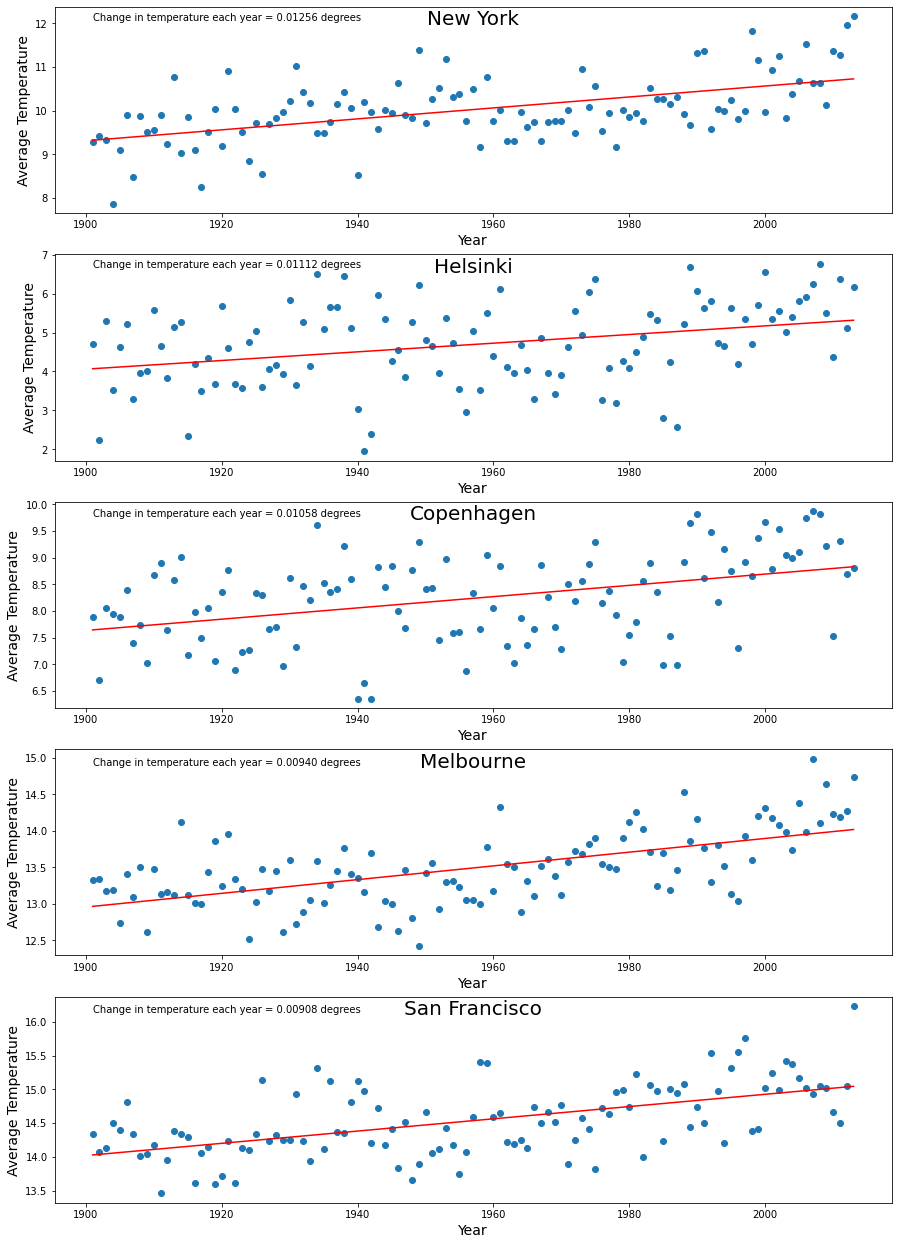

In [ ]:
# Importing land temperature data
temp_data = pd.read_csv('GlobalLandTemperaturesByCity.csv')

## PLOT CHANGE IN TEMPERATURE EACH YEAR FOR FOCUS CITIES ##  
## Here in next line of code you can add a new city if interested
focus_cities = ['New York' ,'Helsinki','Copenhagen','Melbourne','San Francisco']  
no_focus_cities = len(focus_cities)

f = plt.figure()    
f, axes = plt.subplots( nrows = no_focus_cities, ncols = 1,figsize=(15, 22), sharex=False)
row = 0
col = 0

for city in focus_cities:
    ## preparing data##
    data= temp_data.loc[temp_data['City'] == city] # 
    data['Year'] = pd.DatetimeIndex(data['dt']).year
    data = data[data.Year > 1900]
    plot_data = data[['AverageTemperature', 'Year']].groupby(by="Year").mean().dropna().reset_index() 
    ##plotting#
    a,b = np.polyfit(plot_data['Year'], plot_data['AverageTemperature'], 1) #fit line trough average temperature
    axes[row].scatter(plot_data['Year'],plot_data['AverageTemperature']) #plot average temperature each year
    axes[row].plot(plot_data['Year'],a*plot_data['Year']+b,'r') #plot the change in temperature each year
    axes[row].set_title(city, y=0.98, pad=-14,fontsize=20) #Adding label for each crime
    axes[row].set_ylabel('Average Temperature', fontsize=14) #y label set to be the same for all plots
    axes[row].set_xlabel('Year', fontsize=14) #y label set to be the same for all plots
    axes[row].text(plot_data['Year'].min(),plot_data['AverageTemperature'].max()-0.1,('Change in temperature each year = '+str("{:.5f}".format(a))+' degrees')) # add text to plot
    row+=1
    if row==no_focus_cities: # we want as many rows as is in focus cities rows of plots so if we are in row 5 so we do not go out of range.
        row=0

    plt.savefig('Average_temperature.jpg')



### What was your goal for the end user's experience?

We want the user to be able to look through the website and get an understanding on air pollution in New York City and the effects it has on the city's residents. Furthermore, the fundamental goal is to address the research questions that arose during the data analysis. These questions are following:

1.	How has pollution developed in New York in recent years?
2.	Are certain neighborhoods more polluted than others?
3.	Are the source of pollution different in some neighborhoods?
4.	Are more deaths, Asthma Emergency Department Visits, Cardiovascular Hospitalizations and Respiratory Hospitalizations in boroughs that have higher percent of poverty?
5.	Is it possible to predict the pollution in the future ?


## 2. Basic Stats

### Write about your choices in data cleaning and preprocessing

There was not a lot of data cleaning and preprocessing that needed to be applied to the dataset. There was one error found that needed to be fixed before applying any analyses. The UHF42 neighbourhood Bensonhurst - Bay Ridge had a wrong geocode id throughout the entire dataset. This was confirmed using the *NY_geodata* dataset as well as the *UHF_list* dataset. To fix this, the id was simply replaced with the correct code for all occurences of Bensonhurst - Bay Ridge.

To ensure uniformity in the datasets, the Population, Poverty, and Income datasets' time periods had to be aggregated to the same level as the Air Quality dataset. This was accomplished by calculating the mean for each time period in each borough. Then to get a total number of asthma Emergency visits , adults and children were combined. Furhtermore, the pollutant data had values in two different unit measures, *micrograms per cubic meter* and *parts per million*. Again for uniformity all the data was converted to ppb. 

Since the data contains a lot of information from different sources some of the data seemed to overlap, it was therefore decided to use only the data with geo type UHF 42. That contains 42 neighbourhoods that are a part of the United Hospital Fund neighbourhoods. These neighbourhoods were used both in the Pollutant analysis as well as the Traffic and Boiler Emission analysis.


### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis

To get an idea on the dataset stats, let's create some plots to allow us to visualize the data. Before doing anything, we'll apply the data cleaning described in the section above.

In [ ]:
#Importing the main dataset
df_AQ = pd.read_csv("Air_Quality.csv")
#Fixing geocode error
df_AQ.loc[df_AQ['Geo Place Name'] == 'Bensonhurst - Bay Ridge', 'Geo Join ID'] = 209

As you can see here below, the dataset contains multiple different time periods for each variable. For this reason, the appropriate time period needed to be considered carefully for each analysis.

In [ ]:
df_AQ['Time Period'].unique()

array(['Winter 2014-15', 'Annual Average 2017', 'Winter 2017-18',
       'Winter 2010-11', 'Annual Average 2009', 'Annual Average 2010',
       'Summer 2009', 'Annual Average 2011', 'Winter 2013-14',
       'Annual Average 2015', 'Winter 2015-16', 'Annual Average 2016',
       'Annual Average 2018', 'Summer 2018', 'Annual Average 2014',
       'Winter 2009-10', 'Winter 2011-12', 'Winter 2012-13',
       'Summer 2015', 'Summer 2016', 'Winter 2016-17', 'Summer 2010',
       'Annual Average 2013', 'Summer 2013', 'Summer 2014', 'Summer 2017',
       'Annual Average 2012', 'Winter 2008-09', 'Summer 2011',
       'Summer 2012', '2-Year Summer Average 2009-2010', '2015-2017',
       '2009-2011', '2012-2014', '2005-2007', '2013', '2015', '2016',
       '2005', '2011'], dtype=object)

Before starting the analyses, the Air Quality data was split into six different dataframes: Pollutants, Fine Particles, Ozone, Air Toxics, Traffic Density, and Boiler Emissions. These splits were created based on the user guide found [here](https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r) in attachments.

The pollution is explained in the user handbook as follows:

1. *Pollutants*: Outdoor Air Pollutants Estimated annual average concentrations calculated from a model that used NYC Community Air Survey measurements.

2. *Fine Particles*: Health Burden - Fine Particles (PM2.5). Estimated health events attributable to PM2.5 exposure over natural background levels in NYC (average annual rate per 100,000 residents).

3. *Ozone*: Health Burden - Ozone (O3). Estimated health events attributable to ozone exposure over natural background levels in NYC (average annual rate per 100,000 residents).

4. *Air Toxins*: Outdoor Air Toxics Estimated annual average concentrations of known carcinogens that are part of a class of pollutants also known as hazardous air pollutants.

5. *Traffic Density*: Traffic Density Estimated millions of annual vehicle miles traveled per km2. Vehicle miles traveled is an indicator of emissions from automobile exhaust, brake wear and tire wear.

6. *Boiler Emissions*: Heating Fuel Emissions Estimated annual boiler emissions per km2 as of January 2015. Calculated using heating fuel type on NYC boiler permits and estimates of boiler activity. 

In [ ]:
#Splitting Air Quality data into different dataframes
df_Pollutants = df_AQ[df_AQ.Name.isin(['Fine Particulate Matter (PM2.5)', 'Ozone (O3)', 'Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)'])]
df_FineParticles = df_AQ[df_AQ.Name.isin(['PM2.5-Attributable Deaths', 'PM2.5-Attributable Asthma Emergency Department Visits', 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)', 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)'])]
df_Ozone = df_AQ[df_AQ.Name.isin(['O3-Attributable Cardiac and Respiratory Deaths', 'O3-Attributable Asthma Emergency Department Visits', 'O3-Attributable Asthma Hospitalizations'])]
df_AirToxics = df_AQ[df_AQ.Name.isin(['Air Toxics Concentrations- Average Benzene Concentrations', 'Air Toxics Concentrations- Average Formaldehyde Concentrations'])]
df_TrafficDensity = df_AQ[df_AQ.Name.isin(['Traffic Density- Annual Vehcle Miles Traveled', 'Traffic Density- Annual Vehicle Miles Traveled for Cars','Traffic Density- Annual Vehicle Miles Traveled for Trucks'])]
df_BoilerEmissions = df_AQ[df_AQ.Name.isin(['Boiler Emissions- Total SO2 Emissions','Boiler Emissions- Total PM2.5 Emissions','Boiler Emissions- Total NOx Emissions'])]

In [ ]:
#Convert mcg per cubic meter to ppb  -> https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/
df_Pollutants['Measure Info'] = 'mcg per cubic meter'
df_Pollutants.loc[df_Pollutants['Name'] == 'Nitrogen Dioxide (NO2)','Data Value'] *= 1.88
df_Pollutants.loc[df_Pollutants['Name'] == 'Sulfur Dioxide (SO2)','Data Value'] *= 2.62
df_Pollutants.loc[df_Pollutants['Name'] == 'Ozone (O3)','Data Value'] *= 1.96
df_Pollutants = df_Pollutants.round(2)

#get UHF42 data and skip the period 2-year summer average
df_Pollutants = df_Pollutants[df_Pollutants['Geo Type Name'] == 'UHF42']
df_Pollutants = df_Pollutants[df_Pollutants['Time Period'] != '2-Year Summer Average 2009-2010']

Let's create some visualizataions to better understand the data. We'll start by making a plot showing the average pollution value for each neighbourhood from the Pollutants dataframe.

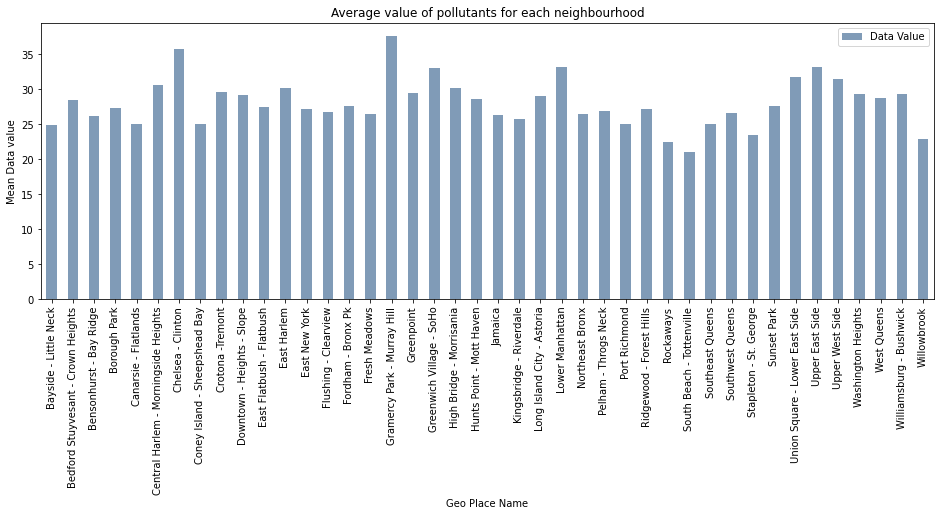

In [ ]:
df_Pollutants[['Data Value', 'Geo Place Name']].groupby(['Geo Place Name']).mean().plot.bar(figsize=(16,8), color='#809bb7')
_=plt.title('Average value of pollutants for each neighbourhood')
_=plt.xticks(rotation='vertical')
plt.ylabel('Mean Data value')
plt.gcf().subplots_adjust(bottom=0.4)

In [ ]:
df_Pollutants[['Data Value', 'Geo Place Name']].groupby(['Geo Place Name']).mean().sort_values(by = ['Data Value'], ascending=False).head(3)

,Data Value
Geo Place Name,
Gramercy Park - Murray Hill,37.591026
Chelsea - Clinton,35.756667
Upper East Side,33.207051


As can be seen in the plot, and the code above, the 3 highest polluting neighborhoods are Gramercy Park - Murray Hill , Chelsea - Clinton, and Upper East Side.

##### Pollution evolution

Next, were going to investigate the number of pollutants for each year to see if they are lowering or if they are on the rise. We're going to investigate each pollutant seperately but then average over all the boroughs to get the big picture for the entire city. We have seperate data for winter, summer, and annual values for some of the pollutants. Therefore, we are also going to see if there is a difference in number of pollutants between seasons.

In [ ]:
#Isolating the years from the time period and adding a field to the dataframe
time_period = list(df_Pollutants['Time Period'])
years = [time[-4:] for time in time_period]
for i in range(len(years)):
    if '-' in years[i]:
        time = years[i].split('-')
        years[i] = '20'+time[1]
df_Pollutants['Year'] = years

#Creating a dict where each pollutant type is a key
df_Pollutants_plot_dict = {'Fine Particulate Matter (PM2.5)': df_Pollutants[df_Pollutants['Name'] == 'Fine Particulate Matter (PM2.5)'], 
                      'Nitrogen Dioxide (NO2)': df_Pollutants[df_Pollutants['Name'] == 'Nitrogen Dioxide (NO2)'],
                      'Ozone (O3)' : df_Pollutants[df_Pollutants['Name'] == 'Ozone (O3)'],
                      'Sulfur Dioxide (SO2)' : df_Pollutants[df_Pollutants['Name'] =='Sulfur Dioxide (SO2)']}

#Grouping by summer/winter/annual and pollutants
for key in df_Pollutants_plot_dict.keys():
    df_Pollutants_plot = df_Pollutants_plot_dict[key]
    df_Pollutants_plot_summer = df_Pollutants_plot[df_Pollutants_plot['Time Period'].str.contains('Summer')]
    df_Pollutants_plot_summer = df_Pollutants_plot_summer[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_summer = df_Pollutants_plot_summer.rename(columns={"Data Value": "Data Value Summer"})
    

    df_Pollutants_plot_winter = df_Pollutants_plot[df_Pollutants_plot['Time Period'].str.contains('Winter')]
    df_Pollutants_plot_winter = df_Pollutants_plot_winter[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_winter = df_Pollutants_plot_winter.rename(columns={"Data Value": "Data Value Winter"})

    
    df_Pollutants_plot_annual= df_Pollutants_plot[df_Pollutants_plot['Time Period'].str.contains('Annual')]
    df_Pollutants_plot_annual = df_Pollutants_plot_annual[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_annual = df_Pollutants_plot_annual.rename(columns={"Data Value": "Data Value Annual"})

    #Merging all the dataframes together for the plot
    df_Pollutants_plot_dict[key] = df_Pollutants_plot_summer.merge(df_Pollutants_plot_winter, left_on='Year', right_on='Year')
    df_Pollutants_plot_dict[key] = df_Pollutants_plot_dict[key].merge(df_Pollutants_plot_annual, left_on='Year', right_on='Year')
    
    if key == 'Ozone (O3)':
        df_Pollutants_plot_dict[key] = df_Pollutants_plot_summer #There are only summer data
        
    if key == 'Sulfur Dioxide (SO2)':
        df_Pollutants_plot_dict[key] = df_Pollutants_plot_winter #There are only winter data


In [ ]:
#Creating tabs for each pollutant
tab = []
for key in df_Pollutants_plot_dict.keys():
    source2 = ColumnDataSource(data=df_Pollutants_plot_dict[key])
    #Creating a tooltip for the hover for each plot
    TOOLTIPS_SUMMER = [
        ("Year", "@{Year}"),
        ("Summer Value", "@{Data Value Summer}"),
    ]

    TOOLTIPS_WINTER = [
        ("Year", "@{Year}"),
        ("Winter Value", "@{Data Value Winter}"),
    ]

    TOOLTIPS_ANNUAL = [
        ("Year", "@{Year}"),
        ("Annual Value", "@{Data Value Annual}"),
    ]



    p = figure()
    p = figure(x_range=list(set(years)).sort(),
               y_range = DataRange1d(range_padding=0.4,only_visible = True))
    #Creating seperate scatters with different colors for different seasons
    line_summer = p.circle(x = 'Year',y = 'Data Value Summer',source=source2, size=12,line_color="#EA3F19", fill_color="white",line_width=3,legend_label="Summer")
    p.add_tools(HoverTool(renderers=[line_summer], tooltips = TOOLTIPS_SUMMER))

    line_winter = p.circle(x = 'Year',y = 'Data Value Winter',source=source2, size=12,line_color="#ff9d5c", fill_color="white",line_width=3, legend_label="Winter")
    p.add_tools(HoverTool(renderers=[line_winter], tooltips = TOOLTIPS_WINTER))

    line_annual = p.circle(x = 'Year',y = 'Data Value Annual',source=source2, size=12,line_color="#3288bd", fill_color="white",line_width=3, legend_label="Annual")
    p.add_tools(HoverTool(renderers=[line_annual], tooltips = TOOLTIPS_ANNUAL))

    p.legend.location = "top_right"
    p.legend.title = "Time Period"
    p.legend.label_text_color = "black"
    p.legend.title_text_color = "black"
    p.border_fill_alpha=0
    p.background_fill_alpha = 0
    p.grid.visible = False
    
    p.xaxis.axis_label = 'Year'
    p.yaxis.axis_label = 'Amount [mcg per cubic meter]'
    p.title = "Amount of different types of pollutants for each year"

    # change border and background of legend
    p.legend.border_line_width = 2
    p.legend.border_line_alpha = 0.8
    p.legend.background_fill_alpha = 0.0
    p.legend.click_policy = 'hide'
    tab.append(Panel(child=p, title = key))


In [ ]:
tabs = Tabs(tabs= tab)
bokeh_deepnote_show(tabs)




ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Annual" (closest match: "Data Value Summer") [renderer: GlyphRenderer(id='5359', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Winter" (closest match: "Data Value Summer") [renderer: GlyphRenderer(id='5339', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Annual" (closest match: "Data Value Winter") [renderer: GlyphRenderer(id='5486', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph r

Looking through the plots we can see that pollution due to PM2.5, NO2, SO2, and O3 has been reducing considerably. This may be due to the *Clean Air Act* which is a law in US that establishes the role of the United States Environmental Protection Agency (EPA) in maintaining and enhancing the nation's air quality and the stratospheric ozone layer. See [here](https://www.epa.gov/clean-air-act-overview/clean-air-act-text) and [here](https://www1.nyc.gov/site/doh/health/health-topics/air-quality-air-pollution-protection.page).



##### Health impact data

The information the Air Quality dataset provided on the health impacts of pollution was one of the things that caught our eye right away. Let's start exploring that data by looking into the amount of deaths there are due to pollution in the city.

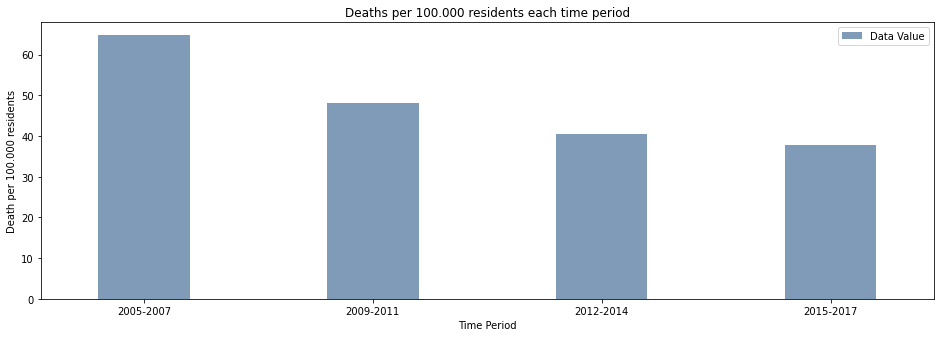

In [ ]:
df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Deaths') & (df_FineParticles['Geo Type Name'] == 'Citywide')][['Data Value', 'Time Period']].sort_values(by = ['Time Period']).plot.bar(x='Time Period',figsize=(16,8), color='#809bb7', width = 0.4)
_=plt.title('Deaths per 100.000 residents each time period')
_=plt.xticks(rotation=360)
plt.ylabel('Death per 100.000 residents')
plt.gcf().subplots_adjust(bottom=0.4)

In [ ]:
df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Deaths') & (df_FineParticles['Geo Type Name'] == 'Citywide')]['Measure Info'].unique()

array(['per 100,000 adults'], dtype=object)

From the plot we can see that in each time period from 2005 the total number of deaths caused by PM2.5 is decreasing. It should also be noted that the data was presented in terms of deaths per 100,000 adults so the numbers could be even higher.

##### Differences between boroughs

Next we wanted to take a look at the average population, poverty, and median income during the period from 2005-2018 in each borough to see if these numbers differs between them.

In [ ]:
#Function to plot population, poverty and median income stats
def plot_stats(df,title,ylabel):
    df[['Data', 'Location']].groupby(['Location']).mean().sort_values(by = ['Data'], ascending= False).plot.bar(figsize=(16,8), color='#809bb7')
    _=plt.title(title)
    _=plt.xticks(rotation=360)
    plt.ylabel(ylabel)
    plt.gcf().subplots_adjust(bottom=0.4)
    return plt

<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

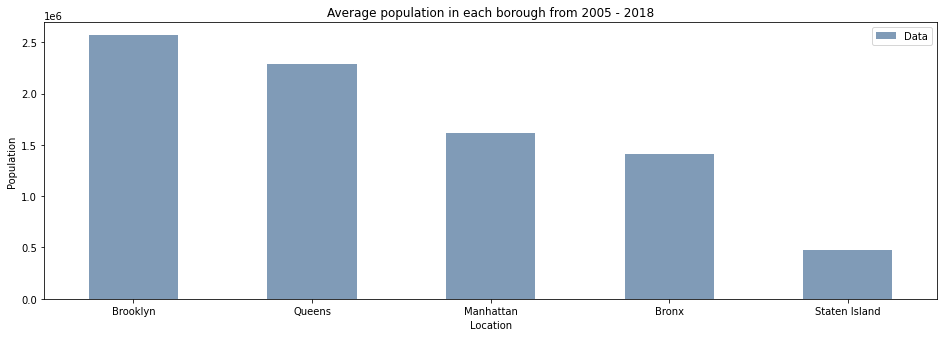

In [ ]:
### IMPORT POPULATION DATA
df_population = pd.read_csv("Total_Population.csv", sep = ';')

#plot stats
plot_stats(df_population,'Average population in each borough from 2005 - 2018','Population')

<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

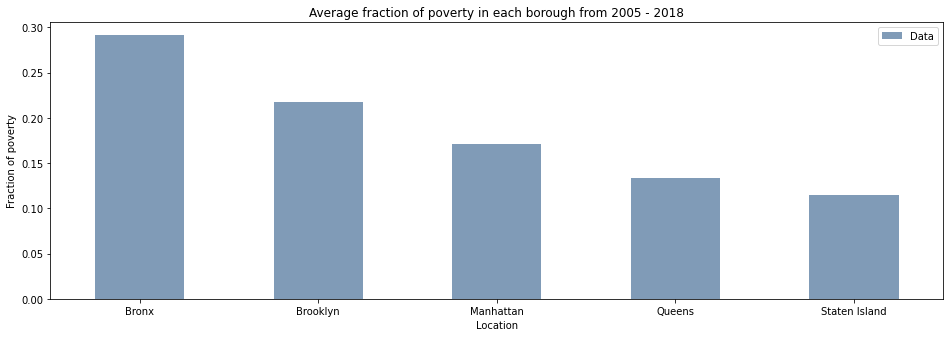

In [ ]:
## IMPORT POVERTY DATA #################
df_poverty = pd.read_csv("Poverty.csv")
#Get Boroughs data
df_poverty = df_poverty.loc[df_poverty['DataFormat'] == 'Percent']
df_poverty = df_poverty[['Location','TimeFrame','Data']]
df_poverty = df_poverty.loc[df_poverty['Location'].isin(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])]#.sort_values(by=['TimeFrame'])
#plot stats
plot_stats(df_poverty,'Average fraction of poverty in each borough from 2005 - 2018','Fraction of poverty')

<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

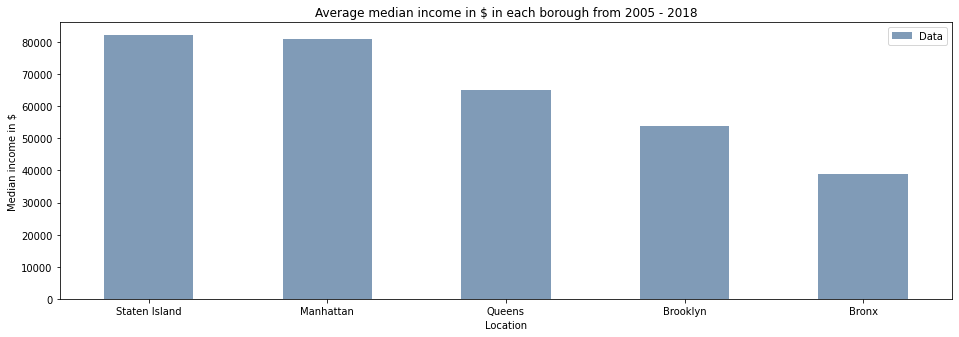

In [ ]:
### IMPORT INCOME DATA, GROUPING AND RENAME COLUMNS TO MAKE THEM FIT OTHER DATAFRAME###
df_income = pd.read_csv("Median_Incomes.csv")
#Get Boroughs data
df_income =df_income.loc[df_income['Location'].isin(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])].loc[df_income['Household Type']=='All Households']#.sort_values(by=['TimeFrame'])
df_income =  df_income[['Location','TimeFrame','Data']]
df_income['Data'] = df_income['Data'].astype(float)
#plot stats
plot_stats(df_income,'Average median income in $ in each borough from 2005 - 2018','Median income in $')

Looking at these plots we can see that Staten Island has the lowest population, the greatest median income, and the lowest poverty rate. The Bronx has the largest percentage of poverty, the lowest median income, and the second smallest population. 

Then lets have a look at which races live in New York City as per US Census Bureau

In [ ]:
df_racial = pd.read_csv("nyc_census_tracts.csv")
df_racial = df_racial.dropna()
df_racial = df_racial[['Hispanic', 'White', 'Black', 'Native', 'Asian','Borough']].groupby(['Borough']).mean().reset_index()


df_racial.columns

Index(['Borough', 'Hispanic', 'White', 'Black', 'Native', 'Asian'], dtype='object')

There are 7 columns for race in the dataset after we added the undefined one.

## 3. Data Analysis

In the beginning of this assignment we introduced five research questions that arose when looking through the data, they were the following:

1.	How has pollution developed in New York in recent years?
2.	Are certain neighborhoods more polluted than others?
3.	Are the source of pollution different in some neighborhoods?
4.	Are more deaths, Asthma Emergency Department Visits, Cardiovascular Hospitalizations and Respiratory Hospitalizations in boroughs that have higher percent of poverty and/or higher percent of African-American(Black) residents?
5.	Is it possible to predict the pollution in the future ?

In this section we are going to do our best to answer these five questions with different visualizations.

### Exploring pollution differences between neigbourhoods

To explore some of the differences the different UHF42 neighbourhoods in New York City might have, let's make some geoplots for visualization. We will create a map of New York containing pollution information for each neighbourhood. We will be creating a few different maps, each containing different pollution information for the city's neighbourhoods.

In [ ]:
# Starting by importing datasets with basic information on neighbourhoods and geojson data for plotting
df_neighbourhoods = pd.read_csv("UHF_list.csv")

geo=r"NY_geodata.json"
file = open(geo, encoding="utf8")
text = file.read()

geoJSON_df = gpd.read_file(geo)

The geoplots will only be displaying pollution information for annual averages. Therefore, all measurements for the summer and winter periods are removed from the Pollutants dataframe.

In [ ]:
#Filtering on Annual Average only and removing all non-numbers from the Time Period column
#That way 'Annual Average 2005' will become '2005'
df_Pollutants_annual = df_Pollutants[df_Pollutants['Time Period'].str.contains('Annual Average')]
df_Pollutants_annual['Time Period'].replace('[a-zA-Z ]+','',regex=True, inplace = True)

In [ ]:
#Creating dataframes to store the information needed for the geoplots and removing NaN and Inf values
boiler_choropleth_df = pd.merge(df_BoilerEmissions, df_neighbourhoods, how='left', left_on = 'Geo Join ID', right_on = 'UHF NEIGHBORHOOD')
boiler_geoInfo_df = geoJSON_df.merge(boiler_choropleth_df,how='left',left_on='GEOCODE',right_on='Geo Join ID')[['GEOCODE','BOROUGH','geometry','Name','Geo Place Name','Time Period','Data Value']]
boiler_geoInfo_df.replace([np.inf, -np.inf], np.nan)
boiler_geoInfo_df = boiler_geoInfo_df.dropna()

pollutants_choropleth_df = pd.merge(df_Pollutants_annual, df_neighbourhoods, how='left', left_on = 'Geo Join ID', right_on = 'UHF NEIGHBORHOOD')
pollutants_geoInfo_df = geoJSON_df.merge(pollutants_choropleth_df,how='left',left_on='GEOCODE',right_on='Geo Join ID')[['GEOCODE','BOROUGH','geometry','Name','Geo Place Name','Time Period','Data Value']]
pollutants_geoInfo_df.replace([np.inf, -np.inf], np.nan)
pollutants_geoInfo_df = pollutants_geoInfo_df.dropna()

traffic_choropleth_df = pd.merge(df_TrafficDensity, df_neighbourhoods, how='left', left_on = 'Geo Join ID', right_on = 'UHF NEIGHBORHOOD')
traffic_geoInfo_df = geoJSON_df.merge(traffic_choropleth_df,how='left',left_on='GEOCODE',right_on='Geo Join ID')[['GEOCODE','BOROUGH','geometry','Name','Geo Place Name','Time Period','Data Value']]
traffic_geoInfo_df.replace([np.inf, -np.inf], np.nan)
traffic_geoInfo_df = traffic_geoInfo_df.dropna()

The geoplots will be displayed with a dropdown menu allowing the user to switch the plot between different pollutants as well as a slider for exploring the changes in the pollution between years.

In [ ]:
#Getting dropdown values
pollutant_dropdown_values = pollutants_choropleth_df.Name.unique().tolist()
boiler_dropdown_values = boiler_choropleth_df.Name.unique().tolist()
traffic_dropdown_values = traffic_choropleth_df.Name.unique().tolist()

#Getting slider years
pollutant_years = pollutants_choropleth_df['Time Period'].unique()
boiler_years = boiler_choropleth_df['Time Period'].unique()
traffic_years = traffic_choropleth_df['Time Period'].unique()

When changing between plots using the dropdown and slider, a JavaScript call will be used to update the plot. In order for this JavaScript call to work with our dataframe, column names cannot contain spaces and the Time Period column must be in a number format.

In [ ]:
#Renaming columns, changing to snake case format
pollutants_geoInfo_df = pollutants_geoInfo_df.rename(columns={"Geo Place Name": "geo_place_name", "Data Value": "data_value", "Time Period": "time_period"})
boiler_geoInfo_df = boiler_geoInfo_df.rename(columns={"Geo Place Name": "geo_place_name", "Data Value": "data_value", "Time Period": "time_period"})
traffic_geoInfo_df = traffic_geoInfo_df.rename(columns={"Geo Place Name": "geo_place_name", "Data Value": "data_value", "Time Period": "time_period"})

#Changing time period to numeric
pollutants_geoInfo_df.time_period = pd.to_numeric(pollutants_geoInfo_df.time_period) 
boiler_geoInfo_df.time_period = pd.to_numeric(boiler_geoInfo_df.time_period) 
traffic_geoInfo_df.time_period = pd.to_numeric(traffic_geoInfo_df.time_period) 

#Creating filtered dataframes, containing the data that will be displayed on each plot when first opened
filtered_pollutants_geoInfo_df = pollutants_geoInfo_df[(pollutants_geoInfo_df.Name == pollutant_dropdown_values[0]) & (pollutants_geoInfo_df['time_period'] == int(np.min(pollutant_years)))]
filtered_boiler_geoInfo_df = boiler_geoInfo_df[(boiler_geoInfo_df.Name == boiler_dropdown_values[0]) & (boiler_geoInfo_df['time_period'] == int(np.min(boiler_years)))]
filtered_traffic_geoInfo_df = traffic_geoInfo_df[(traffic_geoInfo_df.Name == traffic_dropdown_values[0]) & (traffic_geoInfo_df['time_period'] == int(np.min(traffic_years)))]

Next we'll make some functions to create the geoplots. Using these functions we can send our dataframe in as an input parameter and an HTML file will be created containing the Bokeh geoplot. Implementing this functionality with the JavaScript callback function turned out to be very tricky and caused some headaches along the way. The end product works but there are a few Bokeh import lines that need to be added manually to the HTML script in order for the callback function to work correctly. For this reason, the code that calls the functions and creates the plots will not be runnable in the notebook, but the HTML files are displayed in the sections here below.

In [ ]:
def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

In [ ]:
def create_multiselect_geoplot_html(output_file_name, geoInfo_df,filtered_geoInfo_df,plot_title,data_value_caption,dropdown_caption):
    """Create Bokeh GeoPlot HTML file from geoInfo dataframes. Plot includes a dropdown selection and slider."""
    
    ####Creating Slider and Select object for the year slider and dropdown functionality
    start_year = geoInfo_df.time_period.min()
    end_year = geoInfo_df.time_period.max()

    #Some dataframes only have data for 2 different years
    if len(geoInfo_df.time_period.unique()) == 2:
        step = end_year - start_year
    else:
        step = 1

    year_slider = Slider(start=start_year, end=end_year, value=start_year, step=step, title="Year")

    dropdown_values = geoInfo_df['Name'].unique().tolist()
    dropdown_group = Select(title=dropdown_caption, value=dropdown_values[0], options=dropdown_values)

    ####Creating the color map that will be used to represent pollution values in the map
    lowest_value = geoInfo_df[geoInfo_df.Name == dropdown_values[0]]['data_value'].min()
    highest_value = geoInfo_df[geoInfo_df.Name == dropdown_values[0]]['data_value'].max()

    palette = brewer['OrRd'][8]
    palette = palette[::-1]

    color_mapper = LinearColorMapper(palette = palette, 
                                     low = lowest_value,
                                     high = highest_value
                                    )

    ####Converting data to geojson
    original_geosource = get_geodatasource(geoInfo_df)
    geosource = get_geodatasource(filtered_geoInfo_df)

    ####Creating the plot and adding hover functionality
    tools = "pan,wheel_zoom,reset,hover,save"
    p = figure(title = plot_title, plot_height=450 , plot_width=600, toolbar_location=None, tools=tools,
               x_axis_location=None, y_axis_location=None)


    patches = p.patches('xs','ys', 
              source=geosource,
              fill_alpha=1, 
              line_width=0.3, 
              line_color='black',  
              fill_color={'field' : 'data_value' , 
                          'transform': color_mapper}
             )

    hover3 = p.select_one(HoverTool)
    hover3.point_policy = "follow_mouse"
    hover3.tooltips = [
                      ("Neighborhood", "@geo_place_name"),
                      ("Borough", "@BOROUGH"),
                      ("Borough code", "@GEOCODE"),
                      (data_value_caption, "@data_value")]

    ####Creating the JavaScript callback function that will update the map when dropdown or slider are used
    total_callback = CustomJS(args=dict(p = p, source = geosource, original_source = original_geosource, year_slider = year_slider, dropdown_group = dropdown_group, palette=palette, patches=patches), code="""
    var data = source.data;
    var original_data = original_source.data;
    var dropdown = dropdown_group.value;
    var year = year_slider.value;
    var dropdown_data_values=[];

    //Recalculating and creating the colormap for the selected dropdown value
    for (var i = 0; i < original_data['Name'].length; ++i) {
            if (original_data['Name'][i] === dropdown) {
                dropdown_data_values.push(original_data.data_value[i]);
        }
    }

    var lowest_value = Math.min.apply(Math, dropdown_data_values)
    var highest_value = Math.max.apply(Math, dropdown_data_values)

    p.patches = patches

    var color_mapper = new Bokeh.LinearColorMapper({palette: palette,
                                     low: lowest_value,
                                     high: highest_value
                                    })

    patches.glyph.fill_color={'field' : 'data_value',
                        'transform': color_mapper} 


    //Filtering data on selected dropdown value and year
    for (var key in original_data) {

        data[key] = [];
        for (var i = 0; i < original_data['time_period'].length; ++i) {
            if ((original_data['Name'][i] === dropdown) &&
                (original_data['time_period'][i] === year)) {
                data[key].push(original_data[key][i]);
            }
        }
    }
    data['rate'] = data['data_value']

    patches.change.emit();
    source.change.emit();

    """)
    
    year_slider.js_on_change('value', total_callback)
    dropdown_group.js_on_change('value', total_callback)
    
    show(column(dropdown_group,p,year_slider))
    output_notebook()

Now we'll call the function and create three seperate HTML files. For overall air pollution, boiler emission, and traffic density. Remember that this code will not be runnable due to the reason mentioned here above.

In [ ]:
#Creating a dictionary to store input parameters for the different plots
geoplot_variables = {"output_file_name": ['pollutants_multi_select_choropleth.html','boiler_multi_select_choropleth.html','traffic_multi_select_choropleth.html'],
                     "plot_title": ['Pollution in New York City','Boiler Emissions in New York City', 'Traffic Density in New York City'],
                     "data_value_caption": ['Micrograms per m3','Number of particles per km2','Million miles per km2'],
                     "geoInfo_df": [pollutants_geoInfo_df,boiler_geoInfo_df,traffic_geoInfo_df],
                     "filtered_geoInfo_df": [filtered_pollutants_geoInfo_df,filtered_boiler_geoInfo_df,filtered_traffic_geoInfo_df],
                     "dropdown_caption": ['Pollutant Name:','Pollutant Name:','Vehicle Type:']
                    }

In [ ]:
#for i in range(len(geoplot_variables['geoInfo_df'])):
#    create_multiselect_geoplot_html(geoplot_variables['output_file_name'][i],geoplot_variables['geoInfo_df'][i],geoplot_variables['filtered_geoInfo_df'][i], geoplot_variables['plot_title'][i], geoplot_variables['data_value_caption'][i], geoplot_variables['dropdown_caption'][i])
        

### Are some neighbourhoods more polluted than others?

Now that we've created all these geoplots let's have a look at what they can tell us! Could it be that pollution differs from neighbourhood to neighbourhood?

In [ ]:
IFrame(src='pollutants_multi_select_choropleth.html', width=700, height=600)

Looking at the plot we can see that there is definitely a hotspot of pollution in and around Manhattan. This trend remains pretty much consistent for either particle type as well as when scrolling through the years. But what could be causing this hotspot and which neighbourhoods are the ones that remain consistently highest in pollution? Let's look into some different sources of pollution to try to get a better idea on what could be causing this.

### Are the sources of pollution different in some neighbourhoods?

In the data set we have information on both pollution due to boiler emissions as well as some traffic density information on each neighbourhood. Let's look at a geoplot of these pollutants to see if we can shed some light on the Manhattan pollution.

In [ ]:
IFrame(src='boiler_multi_select_choropleth.html', width=700, height=600)

In [ ]:
IFrame(src='traffic_multi_select_choropleth.html', width=700, height=600)

Looking at these geoplots we start to get an idea on why Manhattan is so polluted. The difference in boiler emissions when comparing Manhattan to any other borough is drastic. In addition, there is consistently a high amount of miles travelled in Manhattan but the highest seems to be in the Bronx. The difference is however not as substantial as the difference in boiler emissions.

### Are more deaths, Asthma ER Visits, Cardiovascular Hospitalizations and Respiratory Hospitalizations in boroughs that have higher percent of poverty?

Let's now investigate some of the disparities that the various boroughs of New York may have. We will create a barchart that displays the differences between boroughs for 4 different time periods, grouped by the categories that have all been linked to PM2.5 particles; Death, Asthma ER visits, Cardiovascular hospitalizations and Respiratory hospitalizations.
Then lets add the median income and poverty percentage for the same boroughs and time period. It needs to be noted that the data did not always contain all residents, for Deaths the dataset had values for adults (18 years+), for Asthma the dataset had values for all residents (Children and Adults), Cardiovascular hospitalizations had values for adults (40 years+) and Respiratory hospitalizations had values for adults (20 years+). For that reason, we wanted to know how many people in each age group lived in New York City. We used data of estimates from 2010, found [here](https://www.health.ny.gov/diseases/conditions/vision_and_eye_health/data_and_statistics.htm).

To create the barchart, we use 5 datasets: Air_Quality, Poverty, Total_Population, Media_Incomes and nyc_census_tracts. The code for the bokeh bar plot can be seen down below. Each section is in its own cell with the beginning of the cell showing which data is being prepared and plotted. Much of the code is repeated, but we decided to not put the code into functions, as it made the code less readable with so many input parameters needed.

In [ ]:
########################
###### POPULATION ######
########################
#### POPULATION GROUPING AND RENAME COLUMNS TO MAKE THEM FIT OTHER DATAFRAME ####
#group 3 years togeather
df_population_grouped = df_population.loc[df_population['TimeFrame'].isin([2005,2006,2007])].groupby(by=["Location"]).mean()
df_population_grouped = df_population_grouped.append(df_population.loc[df_population['TimeFrame'].isin([2009,2010,2011])].groupby(by=["Location"]).mean())
df_population_grouped = df_population_grouped.append(df_population.loc[df_population['TimeFrame'].isin([2012,2013,2014])].groupby(by=["Location"]).mean())
df_population_grouped = df_population_grouped.append(df_population.loc[df_population['TimeFrame'].isin([2015,2016,2017])].groupby(by=["Location"]).mean())
#rename TimeFrame Columns so it is like in other dataframes.
df_population_grouped['TimeFrame'] = df_population_grouped['TimeFrame'].replace(2006,'2005-2007')
df_population_grouped['TimeFrame'] = df_population_grouped['TimeFrame'].replace(2010,'2009-2011')
df_population_grouped['TimeFrame'] = df_population_grouped['TimeFrame'].replace(2013,'2012-2014')
df_population_grouped['TimeFrame'] = df_population_grouped['TimeFrame'].replace(2016,'2015-2017')
df_population_grouped = df_population_grouped.reset_index()
df_population_grouped.columns = ['Borough', 'Time Period', 'Population']

In [ ]:
########################
######## INCOME ########
########################

#### INCOME GROUPING AND RENAME COLUMNS TO MAKE THEM FIT OTHER DATAFRAME ####
#group 3 years togeather
df_income_grouped = df_income.loc[df_income['TimeFrame'].isin([2005,2006,2007])].groupby(by=["Location"]).mean()
df_income_grouped = df_income_grouped.append(df_income.loc[df_income['TimeFrame'].isin([2009,2010,2011])].groupby(by=["Location"]).mean())
df_income_grouped = df_income_grouped.append(df_income.loc[df_income['TimeFrame'].isin([2012,2013,2014])].groupby(by=["Location"]).mean())
df_income_grouped = df_income_grouped.append(df_income.loc[df_income['TimeFrame'].isin([2015,2016,2017])].groupby(by=["Location"]).mean())
#rename TimeFrame Columns so it is like in other dataframes.
df_income_grouped['TimeFrame'] = df_income_grouped['TimeFrame'].replace(2006,'2005-2007')
df_income_grouped['TimeFrame'] = df_income_grouped['TimeFrame'].replace(2010,'2009-2011')
df_income_grouped['TimeFrame'] = df_income_grouped['TimeFrame'].replace(2013,'2012-2014')
df_income_grouped['TimeFrame'] = df_income_grouped['TimeFrame'].replace(2016,'2015-2017')
df_income_grouped = df_income_grouped.reset_index()
df_income_grouped.columns = ['Borough', 'Time Period', 'Income']

In [ ]:
########################
######## POVERTY #######
########################
#### POVERTY GROUPING AND RENAME COLUMNS TO MAKE THEM FIT OTHER DATAFRAME ####
#group 3 years togeather
df_poverty_grouped = df_poverty.loc[df_poverty['TimeFrame'].isin([2005,2006,2007])].groupby(by=["Location"]).mean()
df_poverty_grouped = df_poverty_grouped.append(df_poverty.loc[df_poverty['TimeFrame'].isin([2009,2010,2011])].groupby(by=["Location"]).mean())
df_poverty_grouped = df_poverty_grouped.append(df_poverty.loc[df_poverty['TimeFrame'].isin([2012,2013,2014])].groupby(by=["Location"]).mean())
df_poverty_grouped = df_poverty_grouped.append(df_poverty.loc[df_poverty['TimeFrame'].isin([2015,2016,2017])].groupby(by=["Location"]).mean())
df_poverty_grouped

#rename TimeFrame Columns so it is like in other dataframes.
df_poverty_grouped['TimeFrame'] = df_poverty_grouped['TimeFrame'].replace(2006,'2005-2007')
df_poverty_grouped['TimeFrame'] = df_poverty_grouped['TimeFrame'].replace(2010,'2009-2011')
df_poverty_grouped['TimeFrame'] = df_poverty_grouped['TimeFrame'].replace(2013,'2012-2014')
df_poverty_grouped['TimeFrame'] = df_poverty_grouped['TimeFrame'].replace(2016,'2015-2017')
df_poverty_grouped = df_poverty_grouped.reset_index()
df_poverty_grouped.columns = ['Borough', 'Time Period', 'Poverty_Percentage']
df_poverty_grouped['Poverty_Percentage'] = df_poverty_grouped['Poverty_Percentage']*100
df_poverty_grouped = pd.merge(df_poverty_grouped, df_population_grouped, on=["Borough", "Time Period"], how = 'inner')
df_poverty_grouped['Total_poor_residents']=df_poverty_grouped['Population']*(df_poverty_grouped['Poverty_Percentage']/100)

#Merge income data to df_poverty_grouped
df_poverty_grouped = pd.merge(df_poverty_grouped, df_income_grouped, on=["Borough", "Time Period"], how = 'inner')


#### PLOTTING ####
Borough = df_poverty_grouped['Borough'].unique()
Period =  df_poverty_grouped['Time Period'].unique()

x = [(bor, per) for bor in Borough for per in Period]
counts = sum(zip((df_poverty_grouped[df_poverty_grouped['Time Period'] == '2005-2007']['Poverty_Percentage']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2009-2011']['Poverty_Percentage']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2012-2014']['Poverty_Percentage']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2015-2017']['Poverty_Percentage'])), ()) # like an hstack
total_counts = sum(zip((df_poverty_grouped[df_poverty_grouped['Time Period'] == '2005-2007']['Total_poor_residents']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2009-2011']['Total_poor_residents']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2012-2014']['Total_poor_residents']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2015-2017']['Total_poor_residents'])), ()) # like an hstack
income = sum(zip((df_poverty_grouped[df_poverty_grouped['Time Period'] == '2005-2007']['Income']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2009-2011']['Income']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2012-2014']['Income']), (df_poverty_grouped[df_poverty_grouped['Time Period'] == '2015-2017']['Income'])), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts,total_counts=total_counts, income=income ))

TOOLTIPS = [
    #("Year: ", "@year_plot" ),
    ("Poverty percentage", "@counts{1.11}"),
    ("Total Number of residents living in poverty", "@total_counts{1}"),
    ("Median income $", "@income{1}")
]

p_poverty = figure(x_range=FactorRange(*x)
           , plot_width = 600
           , plot_height = 375
           , title="Poverty percentage in each Borough in each Time Period"
           , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset")

p_poverty.vbar(x='x', top='counts', width=0.9 , source=source, fill_color=factor_cmap('x', palette=Oranges4, factors=Period,start=1, end=2)) # legend_label ="No of Deaths"
#p_poverty.line('x','counts')

p_poverty.y_range.start = 0 # to set the bar to start at y = 0
p_poverty.x_range.range_padding = 0.1 # space from y axis and after last bar 
p_poverty.yaxis.axis_label = '%' 
p_poverty.xaxis.axis_label = 'Borough | Time period'
p_poverty.xaxis.major_label_orientation = 1 # to make the years be leaning
p_poverty.xgrid.grid_line_color = None # to make no color behind bars / no grids 
p_poverty.add_tools(HoverTool(tooltips = TOOLTIPS))
p_poverty.toolbar.autohide = False
p_poverty.grid.visible = False
p_poverty.border_fill_alpha = 0
p_poverty.background_fill_alpha = 0


In [ ]:
############################
########### RACE ###########
############################

Borough = df_racial['Borough'].unique()
Race =  ['Black','Hispanic','White', 'Native', 'Asian']

src = ColumnDataSource(data=df_racial)

#TOOLTIPS = [
#    ("$name @Race: @$name")]

p_race = figure(x_range=Borough
           , y_range = DataRange1d(range_padding=0.4,only_visible = True)
           , plot_width = 600
           , plot_height = 425
           , title="Division of races"
           , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset"
           )

colors = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']
renderers = p_race.vbar_stack(Race, x='Borough', width=0.8, color=colors, source=src,
                         legend_label=Race, name=Race)

for r in renderers:
    race = r.name
    hover = HoverTool(tooltips=[
     ("%s percentace" % race, "@%s" % race)
    ], renderers=[r])
    p_race.add_tools(hover)

p_race.y_range.start = 0 # to set the bar to start at y = 0
p_race.x_range.range_padding = 0.01 # space from y axis and after last bar 
p_race.yaxis.axis_label = 'Percentage'
p_race.xaxis.axis_label = 'Borough'

p_race.xgrid.grid_line_color = None
p_race.ygrid.grid_line_color = None
p_race.outline_line_color = None
p_race.legend.background_fill_alpha = 0.0
p_race.legend.border_line_color = "navy"
p_race.legend.location = "top_left"
p_race.legend.orientation = "horizontal"
p_race.toolbar.autohide = True
#p.legend.click_policy = 'hide'
p_race.grid.visible = False
p_race.border_fill_alpha = 0
p_race.background_fill_alpha = 0

In [ ]:
##############
### DEATHS ###
##############
#### PREPARE DEATH DATA ####
death_data = df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Deaths') & (df_FineParticles['Geo Type Name'] == 'Borough')]
death_data = death_data[['Geo Place Name', 'Time Period', 'Data Value']].sort_values(['Time Period','Geo Place Name'])
death_data.columns = ['Borough', 'Time Period', 'Deaths']

death_data = pd.merge(death_data, df_population_grouped, on=["Borough", "Time Period"], how = 'inner')
#78.37% of people in new york were estimated being 40 years or older in 2010
death_data['Total_Deaths']=((death_data['Population']*0.7837)/100000)*death_data['Deaths'] 

#### PLOTTING ####
Borough = death_data['Borough'].unique()
Period =  death_data['Time Period'].unique()
x = [(bor, per) for bor in Borough for per in Period]
counts = sum(zip((death_data[death_data['Time Period'] == '2005-2007']['Deaths']), (death_data[death_data['Time Period'] == '2009-2011']['Deaths']), (death_data[death_data['Time Period'] == '2012-2014']['Deaths']), (death_data[death_data['Time Period'] == '2015-2017']['Deaths'])), ()) # like an hstack
total_counts = sum(zip((death_data[death_data['Time Period'] == '2005-2007']['Total_Deaths']), (death_data[death_data['Time Period'] == '2009-2011']['Total_Deaths']), (death_data[death_data['Time Period'] == '2012-2014']['Total_Deaths']), (death_data[death_data['Time Period'] == '2015-2017']['Total_Deaths'])), ())
population = sum(zip((death_data[death_data['Time Period'] == '2005-2007']['Population']), (death_data[death_data['Time Period'] == '2009-2011']['Population']), (death_data[death_data['Time Period'] == '2012-2014']['Population']), (death_data[death_data['Time Period'] == '2015-2017']['Population'])), ())
source = ColumnDataSource(data=dict(x=x, counts=counts, total_counts = total_counts, population=population))

TOOLTIPS = [
    ("Number of Deaths per 100.000 adults", "@counts{1}"),
    ("Number of Total Deaths (adults)", "@total_counts{1}"),
    ("Number of Total Population", "@population{1}")]

p_death = figure(x_range=FactorRange(*x)
           , y_range = DataRange1d(range_padding=0.4,only_visible = True)
           , plot_width = 600
           , plot_height = 400
           , title="No of PM2.5-Attributable Deaths in each time period"
           , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset")

color_pallete = [Blues4,Oranges4]
bar_cols = ['total_counts','counts']
bar_death ={} 
for indx,i in enumerate(bar_cols):
    bar_death[i] = p_death.vbar(x='x', top=i, width=0.9 , source=source, fill_color=factor_cmap('x', palette=color_pallete[indx], factors=Period,start=1, end=2)) 

items_death = [('Total Deaths adults',[bar_death[bar_cols[0]]])
                ,('Deaths per 100.000 adults',[bar_death[bar_cols[1]]])]  


p_death.y_range.start = 0 # to set the bar to start at y = 0
p_death.x_range.range_padding = 0.1 # space from y axis and after last bar 
p_death.yaxis.axis_label = 'Number of Deaths'
p_death.xaxis.axis_label = 'Borough | Time period'
p_death.xaxis.major_label_orientation = 1.3 # to make the years be leaning
p_death.xgrid.grid_line_color = None # to make no color behind bars / no grids 
legend_death = Legend(items=items_death, location="top_right",background_fill_alpha = 0.0,border_line_color = "navy") # add legend
p_death.add_layout(legend_death )
p_death.legend.click_policy = 'hide'
p_death.add_tools(HoverTool(tooltips = TOOLTIPS))
p_death.toolbar.autohide = True
p_death.grid.visible = False
p_death.border_fill_alpha = 0
p_death.background_fill_alpha = 0

In [ ]:
##############
### ASTHMA ###
##############
#### PREPARE ASTHMA DATA ####
asthma_data = df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Asthma Emergency Department Visits') & (df_FineParticles['Geo Type Name'] == 'Borough')]
asthma_data = asthma_data[['Geo Place Name', 'Time Period', 'Data Value']].sort_values(['Time Period','Geo Place Name'])
asthma_data = asthma_data.groupby(['Geo Place Name','Time Period']).sum().reset_index()
asthma_data.columns = ['Borough', 'Time Period', 'Asthma_ER']
asthma_data = pd.merge(asthma_data, df_population_grouped, on=["Borough", "Time Period"], how = 'inner')
asthma_data['Total_Asthma_ER']=(asthma_data['Population']/100000)*asthma_data['Asthma_ER']

#### PLOTTING ####
Borough = asthma_data['Borough'].unique()
Period =  asthma_data['Time Period'].unique()
x = [(bor, per) for bor in Borough for per in Period]
counts = sum(zip((asthma_data[asthma_data['Time Period'] == '2005-2007']['Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2009-2011']['Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2012-2014']['Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2015-2017']['Asthma_ER'])), ()) # like an hstack
total_counts = sum(zip((asthma_data[asthma_data['Time Period'] == '2005-2007']['Total_Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2009-2011']['Total_Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2012-2014']['Total_Asthma_ER']), (asthma_data[asthma_data['Time Period'] == '2015-2017']['Total_Asthma_ER'])), ())
population = sum(zip((asthma_data[asthma_data['Time Period'] == '2005-2007']['Population']), (asthma_data[asthma_data['Time Period'] == '2009-2011']['Population']), (asthma_data[asthma_data['Time Period'] == '2012-2014']['Population']), (asthma_data[asthma_data['Time Period'] == '2015-2017']['Population'])), ())
source = ColumnDataSource(data=dict(x=x, counts=counts, total_counts = total_counts, population=population))

TOOLTIPS = [
    ("Number of Asthma ER per 100.000 residents", "@counts{1}"),
    ("Number of Total Asthma ER Visits", "@total_counts{1}"),
    ("Number of Total Population", "@population{1}")]

p_asthma = figure(x_range=FactorRange(*x)
         , y_range = DataRange1d(range_padding=0.4,only_visible = True)
        , plot_width = 600
        , plot_height = 400
         , title="No of PM2.5-Attributable Asthma Emergency Department Visits in each time period"
         , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset")

color_pallete = [Blues4,Oranges4]
bar_cols = ['total_counts','counts']
bar_asthma ={} 
for indx,i in enumerate(bar_cols):
    bar_asthma[i] = p_asthma.vbar(x='x', top=i, width=0.9 , source=source, fill_color=factor_cmap('x', palette=color_pallete[indx], factors=Period,start=1, end=2)) 

items_asthma = [('Total Asthma ER visits',[bar_asthma[bar_cols[0]]])
                ,('Asthma ER visits per 100.000 residents',[bar_asthma[bar_cols[1]]])]  


p_asthma.y_range.start = 0 # to set the bar to start at y = 0
p_asthma.x_range.range_padding = 0.1 # space from y axis and after last bar 
p_asthma.yaxis.axis_label = 'Number of asthma ER visits'
p_asthma.xaxis.axis_label = 'Borough | Time period'
p_asthma.xaxis.major_label_orientation = 1.3 # to make the years be leaning
p_asthma.xgrid.grid_line_color = None # to make no color behind bars / no grids 
legend_asthma = Legend(items=items_asthma, location="top_right",background_fill_alpha = 0.0,border_line_color = "navy") # add legend
p_asthma.add_layout(legend_asthma)
p_asthma.legend.click_policy = 'hide'
p_asthma.add_tools(HoverTool(tooltips = TOOLTIPS))
p_asthma.toolbar.autohide = True
p_asthma.grid.visible = False
p_asthma.border_fill_alpha = 0
p_asthma.background_fill_alpha = 0

In [ ]:
##########################################
#### CARDIOVASCULAR HOSPITALIZATIONS #####
##########################################

#### PREPARE CH DATA ####
ch_data = df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)') & (df_FineParticles['Geo Type Name'] == 'Borough')]
ch_data = ch_data[['Geo Place Name', 'Time Period', 'Data Value']].sort_values(['Time Period','Geo Place Name'])
ch_data = ch_data.groupby(['Geo Place Name','Time Period']).sum().reset_index()
ch_data.columns = ['Borough', 'Time Period', 'Cardiovascular_Hospitalizations']
ch_data = pd.merge(ch_data, df_population_grouped, on=["Borough", "Time Period"], how = 'inner')
#43.52% of people in new york were estimated being 40 years or older in 2010
ch_data['Total_Cardiovascular_Hospitalizations']=((ch_data['Population']*0.4352)/100000)*ch_data['Cardiovascular_Hospitalizations']

#### PLOTTING ####
Borough = ch_data['Borough'].unique()
Period =  ch_data['Time Period'].unique()
x = [(bor, per) for bor in Borough for per in Period]
counts = sum(zip((ch_data[ch_data['Time Period'] == '2005-2007']['Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2009-2011']['Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2012-2014']['Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2015-2017']['Cardiovascular_Hospitalizations'])), ()) # like an hstack
total_counts = sum(zip((ch_data[ch_data['Time Period'] == '2005-2007']['Total_Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2009-2011']['Total_Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2012-2014']['Total_Cardiovascular_Hospitalizations']), (ch_data[ch_data['Time Period'] == '2015-2017']['Total_Cardiovascular_Hospitalizations'])), ())
population = sum(zip((ch_data[ch_data['Time Period'] == '2005-2007']['Population']), (ch_data[ch_data['Time Period'] == '2009-2011']['Population']), (ch_data[ch_data['Time Period'] == '2012-2014']['Population']), (ch_data[ch_data['Time Period'] == '2015-2017']['Population'])), ())
source = ColumnDataSource(data=dict(x=x, counts=counts, total_counts = total_counts, population=population))

TOOLTIPS = [
    ("Number of CH per 100.000 residents Adults 40 Yrs+", "@counts{1}"),
    ("Number of Total CH Adults 40 Yrs+", "@total_counts{1}"),
    ("Number of Total Population", "@population{1}")]

p_ch = figure(x_range=FactorRange(*x)
           , y_range = DataRange1d(range_padding=0.4,only_visible = True)
           , plot_width = 600
           , plot_height = 400
           , title="No of PM2.5-Attributable Cardiovascular Hospitalizations (CH) adults 40 Yrs and Older in each time period "
           , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset")


color_pallete = [Blues4,Oranges4]

bar_cols = ['total_counts','counts']
bar_ch ={} 
for indx,i in enumerate(bar_cols):
    bar_ch[i] = p_ch.vbar(x='x', top=i, width=0.9 , source=source, fill_color=factor_cmap('x', palette=color_pallete[indx], factors=Period,start=1, end=2)) 

items_ch = [('Total CH Adults 40 Yrs',[bar_ch[bar_cols[0]]])
                ,('CH per 100.000 residents Adults 40 Yrs+',[bar_ch[bar_cols[1]]])]  


p_ch.y_range.start = 0 # to set the bar to start at y = 0
p_ch.x_range.range_padding = 0.1 # space from y axis and after last bar 
p_ch.yaxis.axis_label = 'No. Cardiovascular Hospitalizations'
p_ch.xaxis.axis_label = 'Borough | Time period'
p_ch.xaxis.major_label_orientation = 1.3 # to make the years be leaning
p_ch.xgrid.grid_line_color = None # to make no color behind bars / no grids 
legend_ch = Legend(items=items_ch, location="top_right",background_fill_alpha = 0.0,border_line_color = "navy") # add legend
p_ch.add_layout(legend_ch)
p_ch.legend.click_policy = 'hide'
p_ch.add_tools(HoverTool(tooltips = TOOLTIPS))
p_ch.toolbar.autohide = True
p_ch.grid.visible = False
p_ch.border_fill_alpha = 0
p_ch.background_fill_alpha = 0


In [ ]:
##########################################
###### RESPIRATORY HOSPITALIZATIONS ######
##########################################
#### PREPARE RH DATA ####
rh_data = df_FineParticles[(df_FineParticles['Name'] == 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)') & (df_FineParticles['Geo Type Name'] == 'Borough')]
rh_data = rh_data[['Geo Place Name', 'Time Period', 'Data Value']].sort_values(['Time Period','Geo Place Name'])
rh_data = rh_data.groupby(['Geo Place Name','Time Period']).sum().reset_index()
rh_data.columns = ['Borough', 'Time Period', 'Respiratory_Hospitalizations']
rh_data = pd.merge(rh_data, df_population_grouped, on=["Borough", "Time Period"], how = 'inner')
#75.6% of people in new york were estimated being 20 years or older in 2010
rh_data['Total_Respiratory_Hospitalizations']=((rh_data['Population']*0.756)/100000)*rh_data['Respiratory_Hospitalizations']

#### PLOTTING #################
Borough = rh_data['Borough'].unique()
Period =  rh_data['Time Period'].unique()
x = [(bor, per) for bor in Borough for per in Period]
counts = sum(zip((rh_data[rh_data['Time Period'] == '2005-2007']['Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2009-2011']['Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2012-2014']['Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2015-2017']['Respiratory_Hospitalizations'])), ()) # like an hstack
total_counts = sum(zip((rh_data[rh_data['Time Period'] == '2005-2007']['Total_Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2009-2011']['Total_Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2012-2014']['Total_Respiratory_Hospitalizations']), (rh_data[rh_data['Time Period'] == '2015-2017']['Total_Respiratory_Hospitalizations'])), ())
population = sum(zip((rh_data[rh_data['Time Period'] == '2005-2007']['Population']), (rh_data[rh_data['Time Period'] == '2009-2011']['Population']), (rh_data[rh_data['Time Period'] == '2012-2014']['Population']), (rh_data[rh_data['Time Period'] == '2015-2017']['Population'])), ())
source = ColumnDataSource(data=dict(x=x, counts=counts, total_counts = total_counts, population=population))

TOOLTIPS = [
    #("Year: ", "@year_plot" ),
    ("Number of RH per 100.000 adults 20 Yrs+", "@counts{1}"),
    ("Number of Total RH adults 20 Yrs+", "@total_counts{1}"),
    ("Number of Total Population", "@population{1}")]

p_rh = figure(x_range=FactorRange(*x)
           , y_range = DataRange1d(range_padding=0.4,only_visible = True)
           , plot_width = 600
           , plot_height = 400
           , title="No of PM2.5-Attributable Respiratory Hospitalizations (RH) adults 20 Yrs and Older in each time period"
           , toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset")

color_pallete = [Blues4,Oranges4]

bar_cols = ['total_counts','counts']
bar_rh ={} 
for indx,i in enumerate(bar_cols):
    bar_rh[i] = p_rh.vbar(x='x', top=i, width=0.9 , source=source, fill_color=factor_cmap('x', palette=color_pallete[indx], factors=Period,start=1, end=2)) 

items_rh = [('Total RH adults 20 Yrs+',[bar_rh[bar_cols[0]]])
                ,('RH per 100.000 adults 20 Yrs+',[bar_rh[bar_cols[1]]])]  


p_rh.y_range.start = 0 # to set the bar to start at y = 0
p_rh.x_range.range_padding = 0.1 # space from y axis and after last bar 
p_rh.yaxis.axis_label = 'No. Respiratory Hospitalizations'
p_rh.xaxis.axis_label = 'Borough | Time period'
p_rh.xaxis.major_label_orientation = 1.3 # to make the years be leaning
p_rh.xgrid.grid_line_color = None # to make no color behind bars / no grids 
legend_rh = Legend(items=items_rh,location="top_right",background_fill_alpha = 0.0,border_line_color = "navy") # add legend
p_rh.add_layout(legend_rh)
p_rh.legend.click_policy = 'hide'
p_rh.add_tools(HoverTool(tooltips = TOOLTIPS))
p_rh.toolbar.autohide = True
p_rh.grid.visible = False
p_rh.border_fill_alpha = 0
p_rh.background_fill_alpha = 0

Now lets add the plot together in tabs and columns for nice visualization.

In [ ]:
grid1 = column(p_death,p_poverty,p_race)
grid2 = column(p_asthma,p_poverty,p_race)
grid3 = column(p_ch,p_poverty,p_race)
grid4 = column(p_rh,p_poverty,p_race)
tab1 = Panel(child=grid1, title = "Deaths")
tab2 = Panel(child=grid2, title = "Asthma ER Visits")
tab3 = Panel(child=grid3, title = "Cardiovascular Hospitalizations")
tab4 = Panel(child=grid4, title = "Respiratory Hospitalizations")
tabs = Tabs(tabs= [tab1,tab2,tab3,tab4])

bokeh_deepnote_show(tabs)

It is quite shocking how many deaths are linked to PM2.5 particles each year. The average death in Bronx from 2005 - 2007 for older than 18 years old is around 270 people per year. Although Brooklyn has the highest number of deaths, it doesn't have the highest proportion. The Bronx has the highest proportion of deaths, Asthma ER visits, Cardiovascular Hospitalizations, and Respiratory Hospitalizations from 2005 - 2011, as shown by removing the total numbers from the graph, as well as the highest percentage of people living in poverty, the lowest median income, and the highest percentage of black and Hispanic people. However, if you look at death rates in Staten Island from 2012 to 2017, you'll notice that they outnumber those in the Bronx. Staten Island has the lowest percentage of poor individuals, the greatest average median income, and the lowest number of black and Hispanic inhabitants. If it is the poor Black and Hispanic people that is dying in Staten Island is not impossible to tell.

There might be numerous reasons why individuals living in poverty have a higher likelihood of being affected by air pollution. Scientists have proposed three major explanations for the existence of inequalities. First, poor social status may render some groups more vulnerable to health concerns due to disadvantage-related variables. Lack of access to health care, food shops, and excellent employment: less job prospects, filthy workplaces, and increased traffic exposure are all issues that might disadvantage populations and raise their risk of injury. Second, certain populations may be more vulnerable to pollution due to causes ranging from racism to class prejudice to housing market dynamics and land prices. Pollution sources, for example, tend to be placed near impoverished populations, increasing exposure to dangerous contaminants. Finally, some populations may be predisposed to increased risk due to existing health issues. People of color, for example, are among the categories most vulnerable to air pollution, and the elderly, African Americans, Mexican Americans, and those living near a major city have a greater prevalence of diabetes. [reference](https://www.lung.org/clean-air/outdoors/who-is-at-risk/disparities#:~:text=The%20burden%20of%20air%20pollution,greater%20responses%20to%20such%20pollution)




### Is it possible to predict pollution in the future?

We wanted to investigate if we could create a model to predict the future amount of pollutants. In order to restrict the prediction from going below zero, the data values were transformed into a log scale. A simple linear regression model was then used, trained using the pollution data from the years 2009-2018 and using features: Name, Geo Place Name, Season, and Year. Predictions were then made for the years 2019-2028.

In [ ]:
#Creating a field in the dataframe with season
seasons=[]
time_period = list(df_Pollutants['Time Period'])
for i in range(len(time_period)):
    time_period[i] = re.sub(r' [0-9|-]+', '', time_period[i])
    seasons.append(time_period[i])
    
df_Pollutants['Season'] = seasons



X = df_Pollutants.copy()
#Picking out features that were going to use for the for the input data
X = X[['Name', 'Geo Place Name', 'Season', 'Year']]
#Transforming the data into log scale to avoid it going below zero
y = np.log10(df_Pollutants['Data Value'])

It is important to transfer the categorical data into numerical data. We decided to use OneHotEncoder, which transforms the data by creating a new column for each categorical value and sets the value to 1 if it belongs to that category, but 0 otherwise. This transformation is good to use when we don't want the data to have any numerical order (i.e. with labels 0,1 or 2 where 0<1<2).

In [ ]:
#get_dummies is a function that does OneHotEncoder
nameEncode = pd.get_dummies(X.Name, prefix='name')
placeEncode = pd.get_dummies(X['Geo Place Name'], prefix='place')
seasonEncode = pd.get_dummies(X['Season'], prefix='season')

X = X.drop(['Name', 'Geo Place Name', 'Season'], axis=1)
X = X.join([nameEncode, placeEncode, seasonEncode])

After we have prepared the data, we split it into test and training data, and train the model. Finally we can make our predictions.

In [ ]:
#Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Training the model using the training data
reg = LinearRegression().fit(X_train, y_train)
#Making predictions using the test data
y_pred = reg.predict(X_test)

In [ ]:
#Checking test score
reg.score(X_test, y_test)

0.8723912080063962

In [ ]:
#Checking train score
reg.score(X_train, y_train)

0.8779139005302046

The score for both the test data and training data is quite similar and very high in both cases. That indicates little overfitting and quite a good model prediction.

##### Creating and plotting our predictions

In [ ]:
#Creating a new dataframe that were going to use for prediction, changing the years
df_Pollutants_pred = X.copy()
df_Pollutants_pred.Year = [str(int(year) + 10) for year in list(df_Pollutants_pred.Year)]

In [ ]:
y_pred = reg.predict(df_Pollutants_pred)

In [ ]:
#Changing back from log scale in order to plot the predicted data and the original data on the same plot
df_Pollutants_pred['Data Value'] = 10**y_pred

In [ ]:
#Splitting the data into a dictionary where each key is a type of pollutant
df_Pollutants_plot_pred_dict = {'Fine Particulate Matter (PM2.5)': df_Pollutants_pred[df_Pollutants_pred['name_Fine Particulate Matter (PM2.5)'] == 1], 
                      'Nitrogen Dioxide (NO2)': df_Pollutants_pred[df_Pollutants_pred['name_Nitrogen Dioxide (NO2)'] == 1],
                      'Ozone (O3)' : df_Pollutants_pred[df_Pollutants_pred['name_Ozone (O3)'] == 1],
                      'Sulfur Dioxide (SO2)' : df_Pollutants_pred[df_Pollutants_pred['name_Sulfur Dioxide (SO2)'] == 1]}

for key in df_Pollutants_plot_pred_dict.keys():
    df_Pollutants_plot = df_Pollutants_plot_pred_dict[key]
    #Grouping the data into summer, winter and annual
    df_Pollutants_plot_summer = df_Pollutants_plot[df_Pollutants_plot['season_Summer'] == 1]
    df_Pollutants_plot_summer = df_Pollutants_plot_summer[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_summer = df_Pollutants_plot_summer.rename(columns={"Data Value": "Data Value Summer"})
    

    df_Pollutants_plot_winter = df_Pollutants_plot[df_Pollutants_plot['season_Winter'] == 1]
    df_Pollutants_plot_winter = df_Pollutants_plot_winter[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_winter = df_Pollutants_plot_winter.rename(columns={"Data Value": "Data Value Winter"})

    
    df_Pollutants_plot_annual= df_Pollutants_plot[df_Pollutants_plot['season_Annual Average'] == 1]
    df_Pollutants_plot_annual = df_Pollutants_plot_annual[['Year', 'Data Value']].groupby(by="Year").mean()
    df_Pollutants_plot_annual = df_Pollutants_plot_annual.rename(columns={"Data Value": "Data Value Annual"})

    
    df_Pollutants_plot_pred_dict[key] = df_Pollutants_plot_summer.merge(df_Pollutants_plot_winter, left_on='Year', right_on='Year')
    df_Pollutants_plot_pred_dict[key] = df_Pollutants_plot_pred_dict[key].merge(df_Pollutants_plot_annual, left_on='Year', right_on='Year')
    
    if key == 'Ozone (O3)':
        df_Pollutants_plot_pred_dict[key] = df_Pollutants_plot_summer #There are only summer data
        
    if key == 'Sulfur Dioxide (SO2)':
        df_Pollutants_plot_pred_dict[key] = df_Pollutants_plot_winter #There are only winter data
        
        

In [ ]:
#Combining the original data and the predicted data
df_Pollutants_plot_dict_combined = {}
for name in df_Pollutants['Name'].unique():
    df1 = df_Pollutants_plot_pred_dict[name]
    df2 = df_Pollutants_plot_dict[name]
    df_Pollutants_plot_dict_combined[name] = pd.concat([df1, df2])
    

In [ ]:
#Plotting the original data and the predicted future data on the same plot
tab = []
for key in df_Pollutants_plot_dict_combined.keys():
    source2 = ColumnDataSource(data=df_Pollutants_plot_dict_combined[key])
    #Tooltips for the hover in the plot with different values for summer, winter and annual
    TOOLTIPS_SUMMER = [
        ("Year", "@{Year}"),
        ("Summer Value", "@{Data Value Summer}"),
    ]

    TOOLTIPS_WINTER = [
        ("Year", "@{Year}"),
        ("Winter Value", "@{Data Value Winter}"),
    ]

    TOOLTIPS_ANNUAL = [
        ("Year", "@{Year}"),
        ("Annual Value", "@{Data Value Annual}"),
    ]

    p = figure()
    p = figure(x_range=list(set(years)).sort(), plot_height=500, plot_width=500)
    #Creating different scatters with different colors for summer, winter and annual data
    line_summer = p.circle(x = 'Year',y = 'Data Value Summer',source=source2, size=12,line_color="#EA3F19", fill_color="white",line_width=3,legend_label="Summer")
    p.add_tools(HoverTool(renderers=[line_summer], tooltips = TOOLTIPS_SUMMER))

    line_winter = p.circle(x = 'Year',y = 'Data Value Winter',source=source2, size=12,line_color="#ff9d5c", fill_color="white",line_width=3, legend_label="Winter")
    p.add_tools(HoverTool(renderers=[line_winter], tooltips = TOOLTIPS_WINTER))

    line_annual = p.circle(x = 'Year',y = 'Data Value Annual',source=source2, size=12,line_color="#3288bd", fill_color="white",line_width=3, legend_label="Annual")

    real_vs_prediction = Span(location=2018.5,
                              dimension='height', line_color='#bfe6ff',
                              line_dash='dashed', line_width=3)
    p.add_layout(real_vs_prediction)
    
    p.add_tools(HoverTool(renderers=[line_annual], tooltips = TOOLTIPS_ANNUAL))

    p.legend.location = "top_right"
    p.legend.title = "Time Period"
    p.legend.label_text_color = "black"
    p.legend.title_text_color = "black"
    p.xaxis.axis_label = 'Year'
    p.yaxis.axis_label = 'Amount [mcg per cubic meter]'
    p.title = "Amount of different types of pollutants for each year for the dataset and future predictions"
    p.grid.visible = False
    p.border_fill_alpha = 0
    p.background_fill_alpha = 0

    # change border and background of legend
    p.legend.border_line_width = 2
    p.legend.border_line_alpha = 0.8
    p.legend.background_fill_color = "white"
    p.legend.background_fill_alpha = 1
    p.legend.click_policy = 'hide'
    tab.append(Panel(child=p, title = key))


In [ ]:
tabs = Tabs(tabs= tab)
bokeh_deepnote_show(tabs)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Winter" (closest match: "Data Value Summer") [renderer: GlyphRenderer(id='4179', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Summer" (closest match: "Data Value Winter") [renderer: GlyphRenderer(id='4414', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "Data Value Annual" (closest match: "Data Value Summer") [renderer: GlyphRenderer(id='4199', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph r

When plotting the original data with the predicted data we can very well see that the data points are following a very slow logarithmic trend. This is true for each pollutant. We can also see that the pollutants are much higher during the winter months than the summer months, in most cases. The dotted line divides the data into two parts: real data on the left and prediction on the right.

## 4. Genre

### Which genre of data story did you use?

To begin with we decided to use annotated chart as our genre but as we developed to the end result, we chose to change it to an interactive slideshow. This choice was taken because we believed it was straightforward to guide the user through the story while also allowing the user to engage with the storylines.

### Tools used from the 3 categories of Visual Narrative and Narrative Structure

These are the tools we used for the 3 categories of Visual Narrative:  **Consistent Visual Platform** for each bokeh plot. We thought that it would be nice for the user experience to have consistency in each graph, having annotation in one panel and the graph in another. We added a **Progress Bar** when appropriate to make it possible for the user to track changes through visualization. We feel we employed **Feature Distinction** by putting a lot of emphasis on the colors of the visualizations and graphs. While telling a story with **Familiar Objects** we thought it would also be important to have the plots with detail on demand.

These are the tools we used for the 3 categories of Narrative Structure: **User Directed Path** was used since the entire website is telling one story, requiring a directed story path. However we also included **Navigation Buttons** so that the user may jump to certain parts of the story if they are interested. We decided to focus on **Annotations** and **Captions** when a new part of the story appeared to make each chapter clear.

## 5. Visualization

### Explaination of visualizations chosen and why are the right for this story


**Temperature development since 1900**

The first graphic shows the temperature change over time for the five cities that were considered at the start of the research. We reasoned that drawing a scatterplot of the average temperature each year and then fitting a line through it would be the best approach to determine which city had the greatest temperature increase. We thought it would be a good idea to let the user know right away that this initiative is about environmental concerns in New York City.

**Pollutant development and prediction**

The second visualization is a scatterplot of how pollution from 4 different fine particles have been developing from 2009 – 2018. It was decided to use a scatterplot since the data was over a time period and the data values were numbers. The four particles are separated into tabs, and the plot depicts the winter, summer, and yearly average of all four. The user may toggle between winter, summer, and annual averages, as well as hover over any point to see the precise value. 

The last visualization is the same as the second one, with one exception. The data plotted contains both the 4 different fine particles for the years 2009 - 2018, as well as the predicted amount of particles for the years 2019 - 2028.


**Distribution of different pollutants by neighbourhood**

In total, three different geo plots were created. These geo plots show the distribution of different pollutants by neighbourhood as well as the traffic density over periods of time. We decided a geo plot would be the best way to allow the user to properly visualize the differences between neighbourhoods and understand locational relationships between the neighbourhoods. Geo plots also provide many interactive tools that further allow the user to explore and understand the data. We used a hover function in the plots that displayed the neighbourhood's name and borough code, the name of the borough it belongs to, and the data value being used for the color scales (i.e pollution amount or miles travelled by cars). Furthermore, we added a slider allowing the user to easily scroll between values in different time periods for the same data. We felt this was a necessary addition since this both gives the user more comprehension of the evolution through time as well as limiting the number of different plots. For the same reason, we decided to include a dropdown menu allowing the user to easily compare different types of pollutants and vehicles. 

**Death, population, poverty, races in boroughs**

When the overall number of all four situations (death, ER asthma visits, Cardiovascular Hospitalizations, and Respiratory Hospitalizations) was plotted, we decided to map each borough as a category and split the different situations into tabs. This was done to illustrate the differences across neighborhoods and to reduce clutter on the plot. As a result, it seemed appropriate to provide a barchart of the overall number and the number per 100.000 residents. The barchart of 100.000 residents depicts the proportionate difference across boroughs. We also thought that because the scale is different, it would be vital to ensure that the scale is reset when the total quantity is removed by the user from the interactive plot. This way, the user can get a sense of the number of instances in each scenario during each time period, while also noting that the cases are going somewhat downward, with the largest case count occurring between 2005 and 2007. Because the barchart is interactive, the user may hover over each bar to obtain the actual number of total cases, cases per 100.000 residents, and total population in the borough during that time period. To make the user aware that there may be a link between death,ER asthma visits, Cardiovascular Hospitalizations, and Respiratory Hospitalizations and individuals financial status and race ,the poverty fraction and racial demographics were plotted using a bar and stacked bar charts. They are both interactive so the user can hover over each bar and get more detailed information.

## 6. Discussion

#### Pollutant numbers and prediction model

From the final scatter plot containing the pollutants between 2009-2018, as well as the prediction data, we can clearly see that the number of pollutants is decreasing. This can be said for every pollutant. According to a report released by the [Health Department](https://www1.nyc.gov/site/doh/about/press/pr2021/health-department-releases-report-on-improvements-in-citywide-air-quality.page) the annual average levels of PM2.5, NO2 and SO2 have gone down 38%, 33% and 97% respectively when inspecting data from 2009-2019. This is consistent with our results, as those levels have gone down 33%, 27% and 95%, with data from 2009-2018. For the first predicted year, 2019, the numbers have gone down 35%, 40%, 79% respectively. The numbers for PM2.5 and NO2 are quite close to those from the Health Department, but the numbers for the SO2 is not very close to the real value. We can therefore conclude that the model might not be predicting very well when it comes to SO2, but it does so quite well for the other pollutants. 

The drastic change in SO2 can be explained by new regulations in New York requiring building owners to convert to cleaner heating oils by 2015. In 2019, traces of SO2 were detected only at 10 of 60 core sites, and the levels at those sites were extremely low ([reference](https://nyccas.cityofnewyork.us/nyccas2021v9/report/2)). The change for other pollutants can be explained by New York's State's strict [air pollution program](https://www.dec.ny.gov/chemical/281.html), that includes regulations permitting and imposing emissions limits.




#### Pollution by location

The first geo plot we plotted revealed a clear division in pollution where the highest amount of pollution was located in and around Manhattan. The second plots provide information regarding which sources of pollution could be causing this division. However, we're still missing some explanation as to why this division could be present. According to an [air survey](https://nyccas.cityofnewyork.us/nyccas2021v9/report/2?fbclid=IwAR3WmrPKHSj_FL16KCntAXAUh845EEdoot2YhRFhbJEb5fxA7jPol9vpH38) conducted by the New York Health Department some locational reasons for an increase in the pollutants are high densities of grills and charbroilers, high traffic densities, high building densities, and industrial areas. The high traffic density supports our conclusion from the traffic geo plot. Manhattan is the most densely populated part of New York City which further explains the pollution hotspot around that area ([reference](https://guides.lib.jjay.cuny.edu/c.php?g=288385&p=1922495)). This could also explain the extreme difference in broiler emissions and why Manhattan is so high in broiler emission pollution.

#### Health effects

The plots shows that in Bronx there is link between health effects, poverty and race but when looking at Staten Island they have more deaths from 2012-2017 than Bronx yet having the lowest percentage of poverty and Black and Hispanic residents. It would be good to get numbers based on race to find out if there really is a link between like the American Lun Association believes. [reference](https://www.lung.org/clean-air/outdoors/who-is-at-risk/disparities#:~:text=The%20burden%20of%20air%20pollution,greater%20responses%20to%20such%20pollution). We do see that the numbers all 4 scenarios are going down that is in line with air pollution going down. If air pollution decreases as predicted by our model, we should witness a significant decrease in the number of cases of health problems caused by air pollution.

### What went well?

Most parts of the assignment went quite well. We think we chose good datasets that had the information we wanted and were easy to merge. It took some time to learn how the Bokeh plots work, as they are a bit hard to understand. But once we learned how to use them they were quite easy to use and show a very nice interactive visualization of the data. Additionally, it took some time to figure out how to generate the geoplot using a slider for the years and a dropdown for different pollutants. But it is a good addition to the website, showing a nice visualization for different the boroughs, with an easy transition between different years and different pollutant types. This helped us avoid having too many plots, but at the same time showing all the important information. We decided to use *Hugo* to build the website. It ended up taking a very long time to implement the Bokeh plots as well as the geoplot on the website but the end result is nice.

### What is still missing? What could be improved? Why?

There are always some things that can be improved on. We're quite happy with our choice of plots, but there could be some improvements in the story telling. We enjoyed the idea of having character direction, where the story telling is involved around a certain character. We believe that this way of telling a story could make the website a lot more enjoyable to go through, but this was not implemented due to lack of time. Possible further work could be to create a prediction model to predict the amount of deaths in future years since there is such a huge decrease in the amount of pollutants. To answer our study question, we would have liked to obtain data on health risks related to air pollution based on boroughs, race, and poverty, but such information was unavailable.

### Contributions

Motivation: 
 
* Rebekka - 70%
* Pálína - 10%
* Hildur - 20%

Basic Stats:

* Rebekka - 30%
* Pálína - 35%
* Hildur - 35%

Data Analysis

* Rebekka - 30%
* Pálína - 30%
* Hildur - 40%

Genre

* Rebekka - 70%
* Pálína - 15%
* Hildur - 15%

Visualisation

* Rebekka - 33%
* Pálína - 33%
* Hildur - 33%

Discussion

* Rebekka - 20%
* Pálína - 50%
* Hildur - 30%



Website

* Rebekka - 10%
* Pálína - 45%
* Hildur - 45%

# 